# **Police Deaths in the USA**
## EDA - Exploratory Data Analysis

**Description:**

## **Imports and set up**

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as py
import plotly.graph_objects as go

In [4]:
data = pd.read_csv('police_deaths.csv')

data.head()


,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC


## **Intial Data Prep**

In [5]:
#Dropping unnecessary columns

data = data.drop(['eow','cause'], axis=1)

#Change date to date data type:

data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d')

data['weekday'] = data['date'].dt.strftime('%A')
data['month'] = data['date'].dt.strftime('%B')

data.append(['weekday', 'month'], ignore_index=True)

data.head()

,person,dept,cause_short,date,year,canine,dept_name,state,weekday,month
0,Constable Darius Quimby,"Albany County Constable's Office, NY",Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY,Monday,January
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY",Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY,Saturday,October
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY",Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY,Thursday,May
3,Marshal Robert Forsyth,United States Department of Justice - United S...,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US,Saturday,January
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC",Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC,Sunday,November


 **Splitting Data between Police Officer Deaths and K9 Unit Deaths**

In [6]:
#Seperate Police Officer deaths from K9 Units

police_deaths = data.loc[data.canine == False]
k9_deaths = data.loc[data.canine == True]

np.size(police_deaths)

225370

## **Exploration 1:**
### Most common cause of death


Change in cause over time - do gun deaths iincrease at an increasing rate?

In [18]:
police_cod = police_deaths[['cause_short', 'person']]
police_cod_grouped = police_cod.groupby('cause_short').count()
police_cod_grouped['Percentage of Total'] = police_cod_grouped.person /  police_cod_grouped.person.sum()
police_cod_grouped.reset_index(level=0, inplace=True)
police_cod_grouped.sort_values(by='person', ascending=False, inplace=True)

police_cod_grouped.head()

,cause_short,person,Percentage of Total
17,Gunfire,11985,0.531792
5,Automobile accident,2335,0.103607
21,Motorcycle accident,1134,0.050317
19,Heart attack,977,0.043351
33,Vehicular assault,882,0.039136


Text(0, 0.5, 'Number of Deaths')

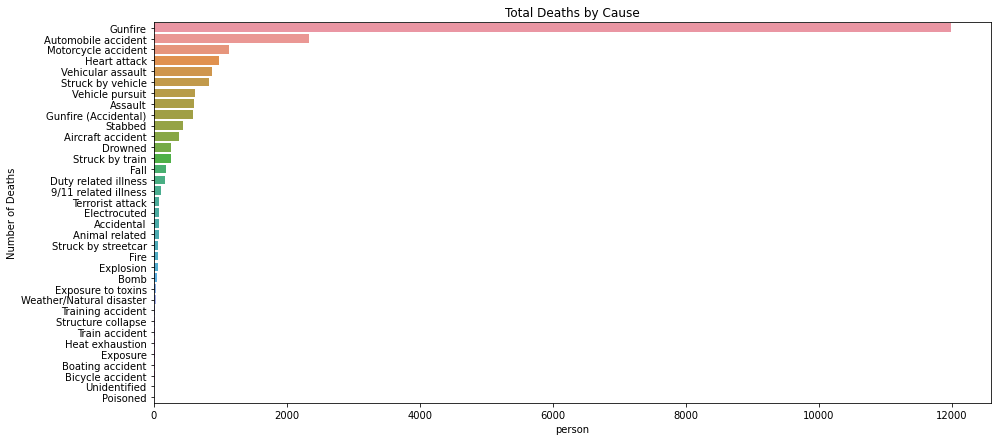

In [19]:
plt.figure(figsize=(15,7))

# Add title
plt.title('Total Deaths by Cause')

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y=police_cod_grouped['cause_short'], x=police_cod_grouped['person'])

# Add label for vertical axis
plt.ylabel('Number of Deaths')

**Gunfire is by far the most often cause of death in this dataset, making up 53% of entire deaths.**

## **Exploration 2:**
### Most common area
*BUG* - WIP need to fix matching betweeen JSON state codes and csv

In [9]:
police_deaths.head()

,person,dept,cause_short,date,year,canine,dept_name,state,weekday,month
0,Constable Darius Quimby,"Albany County Constable's Office, NY",Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY,Monday,January
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY",Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY,Saturday,October
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY",Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY,Thursday,May
3,Marshal Robert Forsyth,United States Department of Justice - United S...,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US,Saturday,January
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC",Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC,Sunday,November


In [112]:
police_st = police_deaths[['state', 'person']]
police_st = police_st[~police_st['state'].str.contains('CZ')]
police_st = police_st[~police_st['state'].str.contains('AS')]
police_st['state'] = police_st['state'].replace('DC', 'WA')


police_st_grouped = police_st.groupby('state').count()
police_st_grouped.reset_index(level=0, inplace=True)
police_st_grouped['state'] = police_st_grouped['state'].astype(str)

#police_st_grouped.sort_values(by='person', ascending=False, inplace=True)

police_st_grouped

,state,person
0,AK,48
1,AL,536
2,AR,283
3,AZ,247
4,CA,1604
5,CO,303
6,CT,142
7,DC,128
8,DE,41
9,FL,789


In [62]:
police_st_grouped.dtypes

state     object
person     int64
dtype: object

In [98]:

import folium
import json
import requests


m = folium.Map(location=[40, -95], zoom_start=4, tiles='OpenStreetMap')

state_geo = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
#return requests.get(state_geo).json()

folium.Choropleth(
    geo_data= state_geo,
    name='choropleth',
    data=police_st_grouped,
    columns=['state', 'person'],
    key_on="feature.features.id",
    fill_color='BuPu',
    #fill_opacity=0.7,
    line_opacity=.1,
    legend_name='abc'
).add_to(m)

folium.LayerControl().add_to(m)

m

# BUG: JSON data does not contain all the states that csv does. Needs keys to match. TODO: Delete/Merge/Update states on csv

AttributeError: 'NoneType' object has no attribute 'get'

## **Exploration 3:**
### Time Series Analysis

In [145]:
# check date column type

police_deaths['date'].dtype

dtype('<M8[ns]')

In [178]:
df = police_deaths.loc[~(police_deaths['year'] <= 1800)]

In [179]:
df = df[['date', 'person']]
df = df.groupby('date').count()
df.reset_index(level=0, inplace=True)

import datetime

df2 = df.groupby(df['date'].dt.strftime('%Y'))['person'].sum().sort_values()
df2 = df2.to_frame()
df2.reset_index(level=0, inplace=True)
df2.sort_values(by='date', ascending=True, inplace=True)
df2

,date,person
0,1804,1
11,1806,1
14,1807,1
23,1808,4
13,1810,1
...,...,...
112,2012,139
101,2013,123
123,2014,145
106,2015,130


In [180]:
df2['date'] = pd.to_datetime(df2['date'])
df2['date'].dtype

dtype('<M8[ns]')

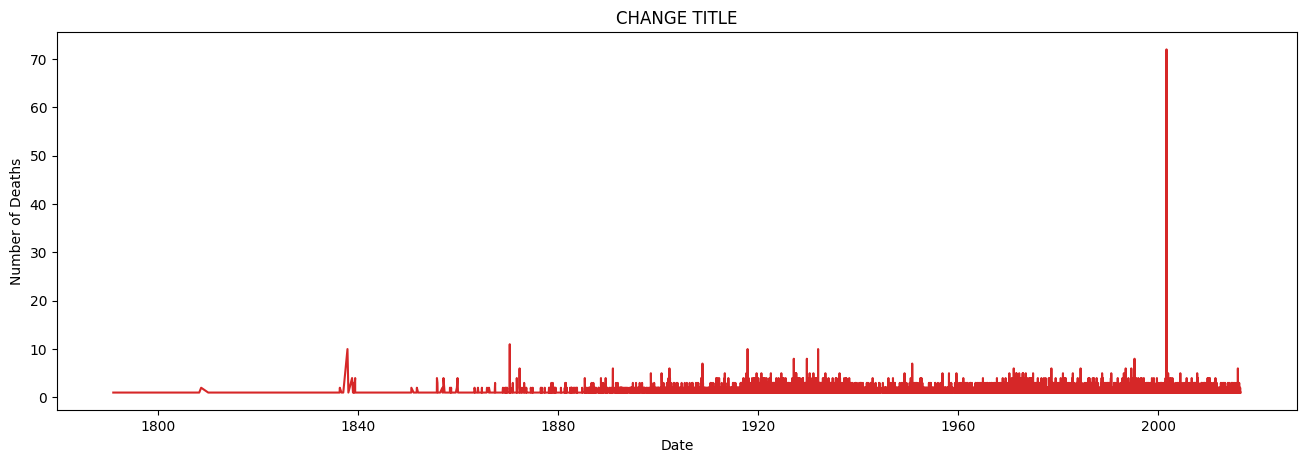

In [127]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Deaths', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.date, y=df.person, title='CHANGE TITLE')  

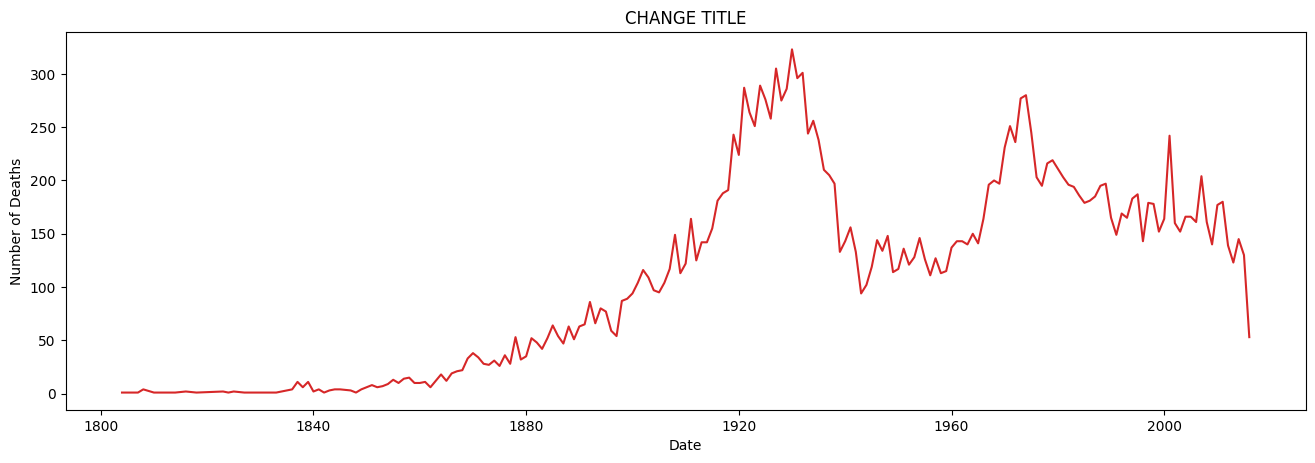

In [181]:
plot_df(df2, x=df2.date, y=df2.person, title='CHANGE TITLE')

## **Exploration 4:** 
### Which days of the week are most fatal for Officers? 

<AxesSubplot:xlabel='weekday', ylabel='month'>

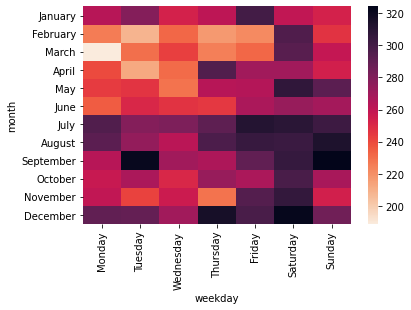

In [17]:
#group and count per day

police_deaths_grouped = police_deaths.groupby('month')['weekday'].value_counts().to_frame(name='deaths').reset_index()

#Sort by Month

months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']
police_deaths_grouped['month'] = pd.Categorical(police_deaths_grouped['month'], categories=months, ordered=True)

#Sort by Weekday

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

police_deaths_grouped['weekday'] = pd.Categorical(police_deaths_grouped['weekday'], categories=weekdays, ordered=True)

police_deaths_grouped.sort_values(by=['month','weekday'],inplace=True)

# police_deaths_grouped

pol_pivot = police_deaths_grouped.pivot('month','weekday', 'deaths')


sns.heatmap(pol_pivot,
            fmt='.1f',
            annot_kws={'size':10},
            square=False,
            cmap = 'rocket_r')

The above heatmap shows the fatalities by days per month. The darker areas represent more, and lighter areas means less.

As can be seen, Monday of March tends to be the safest day of the year in terms of reduced police deaths.

## **Exploration 5:**
### Key Features - Mutual Information

Ideas: 

- Join Weather/Average Temperature
- Moon cycles (Full moon?)
- look into causation != correlation, how to tell?